In [27]:
import inout
import plotly.express as px
from app import TEST_MODEL, FINAL_MODEL
from sklearn_evaluation import plot

# Model evaluation
## Test model
We first split the train dataset in train + validation, just to see how the model would perform. We calculated the F1 score and visualized a confussion matrix. Seeing that the results were good, we then retrained a new model on the whole train dataset, to have as maximum information as possible.
### F1 score
The F1 score combines these two metrics:
- Precision: for each class, it tells us how many of the values predicted as that class belong really to that class.
- Recall: for each class, it tells us how many of the values belonging to that class were predicted is it. 
  
When using macro average, which is the case, all classes contribute equally to the final score, no matter how often they appear in the dataset. We've got an F1 score of 0.89 with the test split of the data.

In [28]:
classifier = inout.load_model_from_pickle(TEST_MODEL)
classifier.f1score

0.8981436317510458

### Confusion Matrix
We can see that the model has a reasonable good performance. It predicts the true label most of the times.

In [29]:
px.imshow(classifier.cm,
          title='Best estimator confusion matrix',
          labels=dict(x='Predicted', y='Truth', color='Number'),
          x=['Class: 0', 'Class: 1', 'Class: 2'], 
          y=['Class: 0', 'Class: 1', 'Class: 2'], 
          text_auto=True)

## Final model
To evaluate the final model, we've used the library sklearn_evaluation to plot different graphsics that helps us visualize how the different hyperparameters affect the final score.

### Best estimator parameters
The Grid Search was performed with the following parameters:
``` python
params = {'max_depth': range(10, 18, 2), 
          'n_estimators': [1000],
          'criterion':['gini', 'entropy'], 
          'max_features': ['sqrt', 0.33,0.4,0.66,0.8,1]
        }
```
We see that a max depth of 14, a max_features value of 0.4, and using entropy as criterion to measure the quality of the splits gives us the best performance.

In [26]:
classifier = inout.load_model_from_pickle(FINAL_MODEL)
print(f'Metric used to score: {classifier.model.scorer_}')
print(f'Best model Score: {classifier.model.best_score_}')
classifier.model.best_params_

Metric used to score: make_scorer(f1_score, pos_label=None, average=macro)
Best model Score: 0.9062717605668233


{'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 0.4,
 'n_estimators': 1000}

### Evaluating max_features
Plotting the mean score based on the number of features and the criterion. The algorithm worked better when 40% of the features where considered when looking for the best split. It's not a high number, which indicates that the data might be very clean, without many outliers. 

Apart from that, we see that, in general, entropy works better. So in advance we'll only plot the results that used entropy as criterion.

<AxesSubplot:title={'center':'Grid search results'}, xlabel='max_features', ylabel='Mean score'>

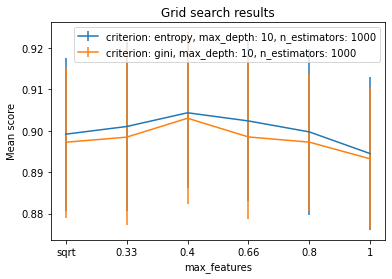

In [20]:
plot.grid_search(classifier.model.cv_results_, 
                 change='max_features', 
                 subset={'criterion': ['gini', 'entropy'], 
                         'max_depth': 10})

### Evaluating max_depth
Taking the best values for the rest of parameters, and ploting how the score changed based on the max_depth of the trees, we see that this parameter didn't variate the score so much.

<AxesSubplot:title={'center':'Grid search results'}, xlabel='max_depth', ylabel='Mean score'>

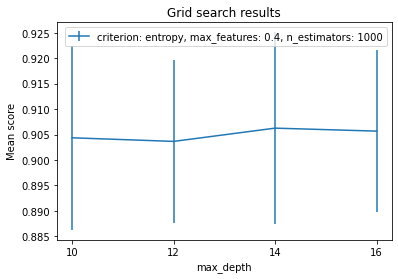

In [16]:
plot.grid_search(classifier.model.cv_results_, 
                 change='max_depth', 
                 subset={'criterion': 'entropy', 
                         'max_features': 0.4}, 
                 sort=False)

### Feature importance
Ploting the importance of each feature in the dataset, we see that there are some features that are more correlated with the target. 

<AxesSubplot:title={'center':'Feature importances'}>

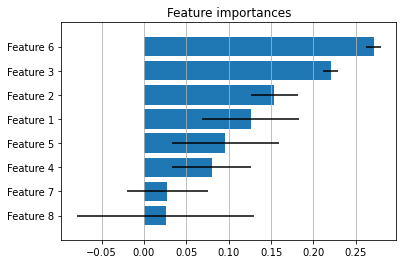

In [21]:
plot.feature_importances(classifier.model.best_estimator_)